<a href="https://colab.research.google.com/github/FerrazThales/Health_Insurance_Cost_Prediction/blob/main/Health_Insurance_Cost_Prediction_with_Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img width="32%" src="https://github.com/FerrazThales/FerrazThales/blob/main/logo_gif.gif?raw=true">

[Thales Ferraz 👨‍💻 | Data Scientist](https://thalesferraz.medium.com/)

* Visite também o meu artigo sobre esta análise no [Medium]()

* Visite mais projetos do meu portfólio no [Github](https://bit.ly/3DQyZHu)

* Vamos trocar mais idéias sobre Data Science no [LinkedIn](https://www.linkedin.com/in/thalesdefreitasferraz/)?

# O que você vai aprender nesta análise:

* O que é **seguro de vida**, como ele é calculado e a importância para seus familiares.
* O que é um algoritmo de **regressão** e algumas de suas **métricas**.
* Como usar o **Pycaret**, um algoritmo de Auto Machine Learning.

#Seguro de Vida - As seguradoras não se preocupam só com carros.

Dados da [Confederação Nacional de Seguros - CNSeg](https://revistasegurototal.com.br/2021/08/30/cnseg-debate-seguro-de-vida-com-especialistas-da-fenaprevi/) apontam que a modalidade de Seguro de Vida cresceu cerca de 10% entre 2016 e 2021. Isso representa um percentual duas vezes maior que a média dos outros tipos de seguros. Este crescimento esta relacionado a uma maior conscientização da população e uma maior oferta deste produto pelas empresas.

Mas afinal, o que é seguro de vida e quando é importante fazer um? Neste [vídeo](https://www.youtube.com/watch?v=vmXF4fK4zq0) a Nath do canal Me poupe! explica mais detalhadamente e apresenta algumas empresas que oferem este tipo de produto. Em resumo, um seguro de vida tem como objetivo auxiliar financeiramente o segurado e a sua família a manter o mesmo padrão de vida, caso o segurado venha a falecer ou sofrer com doenças graves.

Ou seja, se um cantor perder a voz ele receberá o valor contratado por conta deste [sinistro](https://www.mapfre.com.br/para-voce/seguro-vida/perguntas-frequentes/quem-e-o-sinistrado-no-seguro-de-vida/#:~:text=No%20seguro%20de%20vida%2C%20o,vida%20%C3%A9%20o%20pr%C3%B3prio%20segurado.&text=No%20caso%20de%20doen%C3%A7a%2C%20acidente,quem%20poder%C3%A1%20receber%20a%20indeniza%C3%A7%C3%A3o.). Se um autônomo ficar incapacitado de trabalhar por um tempo determinado, ele também receberá o valor que foi contratado. Ou até mesmo, se um pai responsável financeiramente por sua família vier a falecer(de COVID, por exemplo) a seguradora pagará a familia uma indenização que foi estipulado por contrato.

Este tipo de seguro traz proteção financeira e garante a família do segurado (e até ele mesmo) uma menor preocupação em momentos delicados e difíceis que passamos na vida.

<p align="center">
<img src="https://image.freepik.com/free-vector/illustration-family-life-insurance_53876-40781.jpg">
</p>

Para o cálculo desta categoria de seguro, as seguradoras consideram o perfil do segurado e quais coberturas ele escolhe. Desta forma, o valor do seguro varia conforme as coberturas que foram estipuladas na [apólice](https://mag.com.br/blog/educacao-financeira/artigo/o-que-e-apolice-de-seguro-de-vida). Para estipular os valores, são considerados alguns aspectos como: renda mensal, idade, histórico médico, profissão e lazer.

Geralmente, as seguradoras usam uma [tábua biométrica]() e algumas fórmulas de estatística e probabilidade para calcular os valores em sua empresa. No entanto, ter um modelo que utiliza inteligência artificial que se adequa ao seu próprio banco de dados pode trazer grandes vantagens competitivas para o seu negócio.

falar do objetivo do projeot

# Obtenção dos Dados

Os dados utilizados neste projeto são baseados no [GitHub sobre a COVID](https://github.com/owid/covid-19-data/tree/master/public/data). Nele, estão sendo atualizadas **diariamente** as informações sobre a  COVID-19. É importante ressaltar, que este trabalho de obtenção de dados é mantido por uma organização chamada [Our World in Data](https://ourworldindata.org/about).

Esta organização surgiu com o intuito de tornar os **dados acessíveis** de diferentes problemas do mundo. Além da COVID-19, existem estudos sobre a fome, a pobreza, mudanças climáticas, guerras e a desigualdade social. Desta forma, esta entidade se propõe a mudar o mundo e nosso futuro através de **pesquisas** e **análise** de dados.

Obviamente, por se tratar de temas que envolve muita política, podem existir ausências ou divergências nos dados divulgados. Inclusive, por conta disso, a imprensa brasileira criou um orgão próprio para mensurar a **gravidade** da pandemia no país, o [Consórcio da Imprensa](https://pt.wikipedia.org/wiki/Cons%C3%B3rcio_de_Ve%C3%ADculos_de_Imprensa). Este orgão foi criado porque o governo federal, naquele momento, estava restringindo o acesso a determinados dados. 

## Dicionário de Variáveis
* `age` : Idade.
* `sex` : Gênero.
* `bmi` : Índice de Massa Corporal, o [IMC](https://pt.wikipedia.org/wiki/%C3%8Dndice_de_massa_corporal).
* `children` : Quantidade de crianças que possui o segurado.
* `smoker` : Se o segurado é fumante ('yes' ou 'no').
* `region` : Região residencial em que mora o segurado.
* `charges` : Valor cobrado pela seguradora.

#Análise Exploratória dos Dados

texto explicando a análise

In [2]:
#importando os módulos padrão que serão usados no projeto
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
#obter sempre os mesmos valores
np.random.seed(42)

import seaborn as sns

#ignorar as warnings
import warnings
warnings.filterwarnings('ignore')

Para facilitar a reprodução deste dataset, coloquei os dados em meu próprio [Github](https://github.com/FerrazThales).

In [3]:
#endereço dos dados no github
endereco_dos_dados = "https://raw.githubusercontent.com/FerrazThales/Health_Insurance_Cost_Prediction/main/insurance.csv"

#lendo o arquivo em csv e guardando na variável df
df = pd.read_csv(endereco_dos_dados)

#exibindo as 5 primeiras entradas
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#exibindo os valores de entrada e saída da base de dados
print('Esta base de dados possui:')
print('{} entradas'.format(df.shape[0]))  #colocar ponto
print('{} variáveis'.format(df.shape[1]))

Esta base de dados possui:
1338 entradas
7 variáveis


In [5]:
#nome das colunas do dataset
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

comentário sobre o tipo de dados

In [6]:
#avaliando os tipos de valores do dataset
pd.DataFrame(df.dtypes,columns=['Tipo de Dados'])

,Tipo de Dados
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [7]:
#Avaliando quais são os valores únicos de algumas variáveis
print('Valores únicos da variável sex: {}'.format(df.sex.unique()))
print('Valores únicos da variável smoker: {}'.format(df.smoker.unique()))
print('Valores únicos da variável region: {}'.format(df.region.unique()))

Valores únicos da variável sex: ['female' 'male']
Valores únicos da variável smoker: ['yes' 'no']
Valores únicos da variável region: ['southwest' 'southeast' 'northwest' 'northeast']


falar de valores vazios

In [8]:
#Avaliando a quantiade de valores vazios
pd.DataFrame(df.isnull().sum(),columns=['Quantidade de Valores Vazios'])

,Quantidade de Valores Vazios
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


falar sobre a estatística

In [9]:
df.describe().round(2)

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


falar sobre a análise de correlação de variáveis e explicar

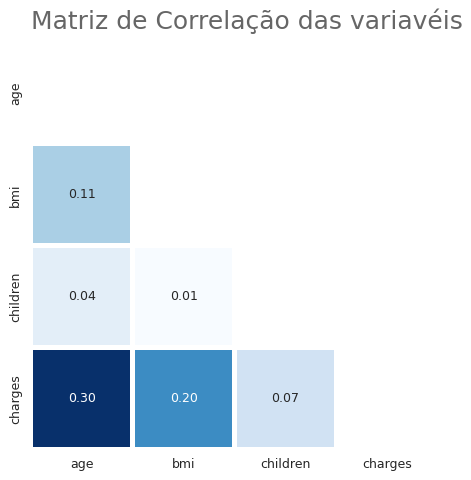

In [10]:
#calculando a matriz de correlação entre as variáveis
matriz_de_correlacao = df.corr()

#criando uma máscara para melhor visualização
mascara = np.zeros_like(matriz_de_correlacao)
mascara[np.triu_indices_from(mascara)] = True

#plotando a matriz de correlação usando seaborn
with sns.axes_style('white'):
  fig,ax = plt.subplots(figsize=(6,6),dpi=90)
  ax = sns.heatmap(matriz_de_correlacao,mask=mascara,square=True,cmap='Blues',annot=True,fmt='.2f',linewidths=3,cbar=False)
  ax.set_title('Matriz de Correlação das variavéis',loc='left',pad=10,fontdict={'fontsize':20},color='#666666')

histograma das idades -> mais jovens e ver os valores que mais são cobrados

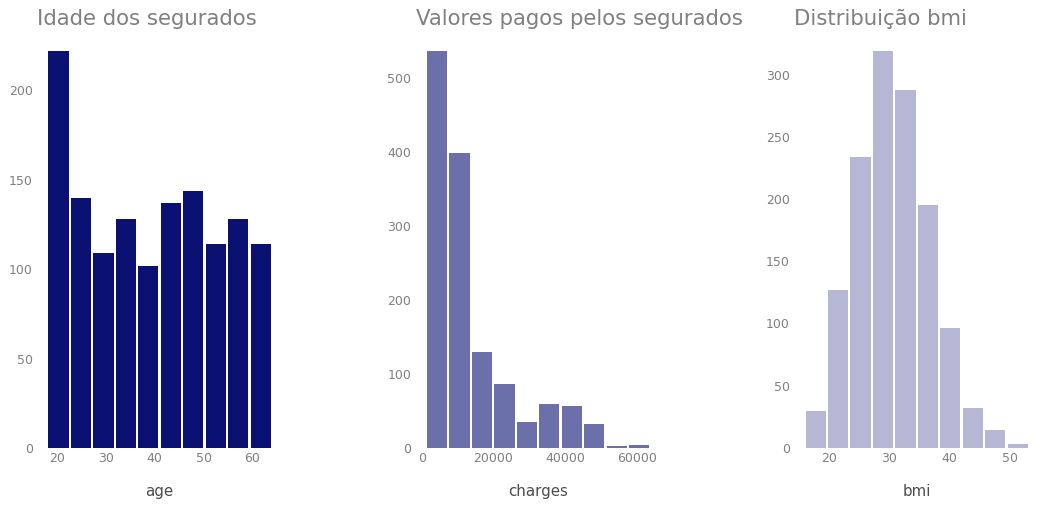

In [11]:
#criando o ax e o fig no matplotlib
fig,ax = plt.subplots(ncols=3,figsize=(12,6),dpi=90)

#criação do histograma para a idade
ax[0].hist('age',data=df,color='#0a1172',rwidth=0.9)
ax[0].set_frame_on(False)
ax[0].grid(lw=0.0)
ax[0].tick_params(axis='both',length=0,colors='grey')
ax[0].set_title('Idade dos segurados',loc='left',pad=5,fontdict={'fontsize':17},color='grey')
ax[0].set_xlabel('age',labelpad=15,fontdict={'fontsize':12},color='#4c4c4c')

#criação do histograma para valores pagos
ax[1].hist('charges',data=df,color='#0a1172',alpha=0.6,rwidth=0.9)
ax[1].set_frame_on(False)
ax[1].grid(lw=0.0)
ax[1].tick_params(axis='both',length=0,colors='grey')
ax[1].set_title('Valores pagos pelos segurados',loc='left',pad=5,fontdict={'fontsize':17},color='grey')
ax[1].set_xlabel('charges',labelpad=15,fontdict={'fontsize':12},color='#4c4c4c')

#criação do histograma para bmi
ax[2].hist('bmi',data=df,color='#0a1172',alpha=0.3,rwidth=0.9)
ax[2].set_frame_on(False)
ax[2].grid(lw=0.0)
ax[2].tick_params(axis='both',length=0,colors='grey')
ax[2].set_title('Distribuição bmi',loc='left',pad=5,fontdict={'fontsize':17},color='grey')
ax[2].set_xlabel('bmi',labelpad=15,fontdict={'fontsize':12},color='#4c4c4c')

#plotando o gráfico
plt.tight_layout(pad=2.0);

avaliando ímc e se é fumante - texto

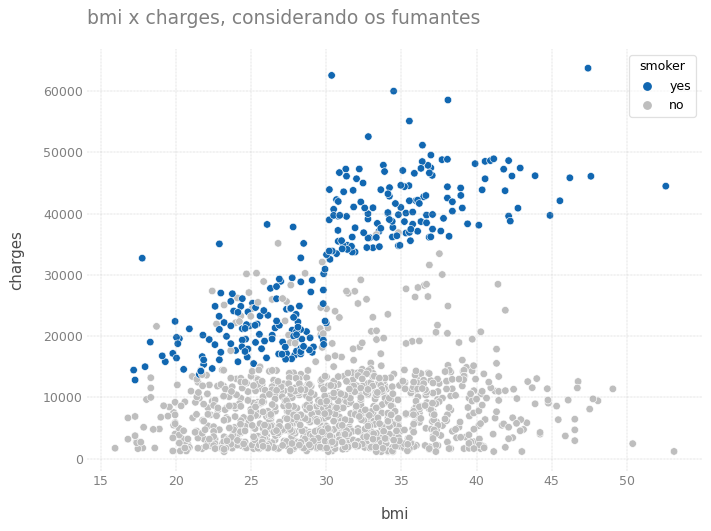

In [12]:
#criando o ax e o fig no matplotlib
fig,ax = plt.subplots(figsize=(8,6),dpi=90)

#construindo o scatter com seaborn
sns.scatterplot(data=df,x='bmi',y='charges',hue='smoker',ax=ax,palette=['#1167b1','#BEBEBE'])
ax.set_frame_on(False)
ax.grid(linestyle='-.',lw=0.25,aa=True)
ax.legend(loc='best',title='smoker',framealpha=0.6)
ax.tick_params(axis='both',length=0,colors='grey')
ax.set_title('bmi x charges, considerando os fumantes',loc='left',pad=20,fontdict={'fontsize':15},color='grey')
ax.set_xlabel('bmi',labelpad=15,fontdict={'fontsize':12},color='#4c4c4c')
ax.set_ylabel('charges',labelpad=15,fontdict={'fontsize':12},color='#4c4c4c')

#plotando o gráfico
plt.tight_layout();

comparação gênero  -> procurar um pouco mais sobre outliers nos dados

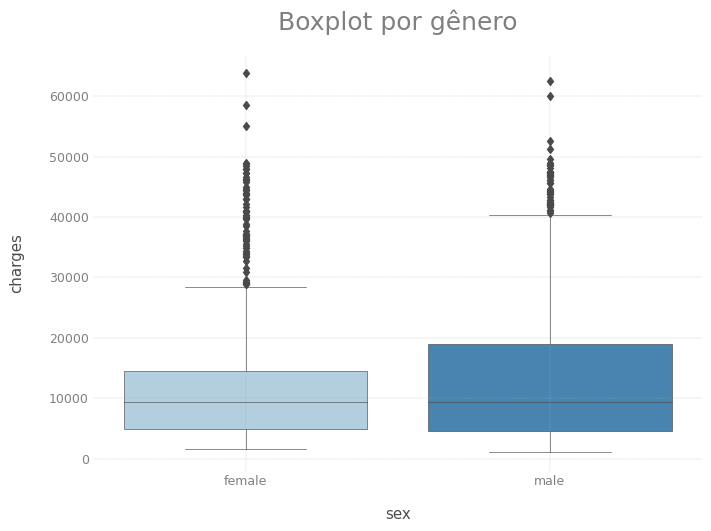

In [13]:
#criando o ax e o fig no matplotlib
fig,ax = plt.subplots(figsize=(8,6),dpi=90)

#criação do boxplot
sns.boxplot(data=df,x='sex',y='charges',ax=ax,palette='Blues',linewidth=0.5)
ax.grid(linestyle='--',lw=0.25,aa=True)
ax.set_frame_on(False)
ax.tick_params(axis='both',length=0,colors='grey')
ax.set_xlabel('sex',labelpad=15,fontdict={'fontsize':12},color='#4c4c4c')
ax.set_ylabel('charges',labelpad=20,fontdict={'fontsize':12},color='#4c4c4c')
ax.set_title('Boxplot por gênero',loc='center',pad=20,fontdict={'fontsize':20},color='grey')

#plotando o gráfico
plt.tight_layout();

comparacao entre as regiões

In [14]:
#funcao feita para colocar o rotulo de dados
def addlabels(x,y):
  for i in range (len(x)):
    ax.text(i,y[i] + 100000,'R$ {:,}'.format(int(y[i])).replace(',','.'),ha='center',fontsize=16,color='grey')

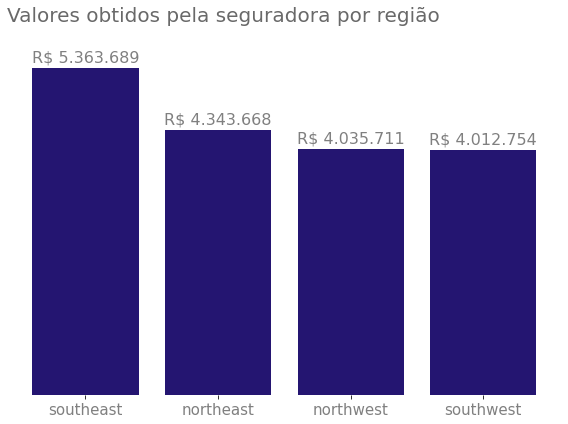

In [15]:
#criando o ax e o fig no matplotlib
fig,ax = plt.subplots(figsize=(8,6))

#criação do gráfico com as regiões
dados_regioes = df.groupby(by='region').sum().sort_values(by='charges',ascending=False)
ax.bar(data=dados_regioes,x=dados_regioes.index,height='charges',color='#241571')
ax.set_title('Valores obtidos pela seguradora por região',loc='left',pad=30,fontdict={'fontsize':20},color='dimgrey')
ax.tick_params(axis='x',rotation=0,labelsize=15,labelcolor='grey')
ax.set_frame_on(False)
ax.get_yaxis().set_visible(False)
ax.grid(False)

#colocando os rótulos de dados
addlabels(dados_regioes.index,dados_regioes.charges)

#plotando o gráfico
plt.tight_layout();

balanceamento dos dados

In [16]:
#funcao feita para colocar o rotulo de dados
def addlabels(x,y):
  for i in range (len(y)):
    ax.text(i,y[i] + 10,'{:,}'.format(int(y[i])).replace(',','.'),ha='center',fontsize=18,color='grey')

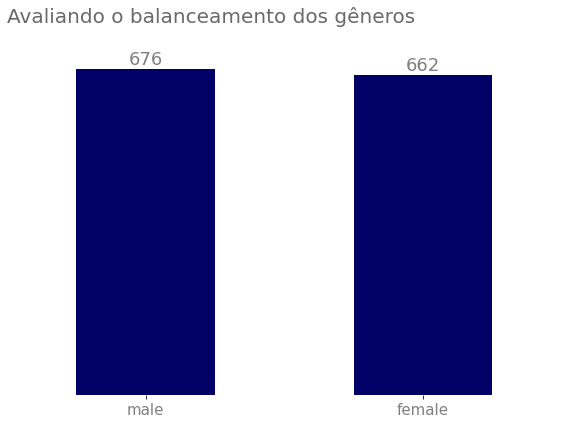

In [17]:
#criando o ax e o fig no matplotlib
fig,ax = plt.subplots(figsize=(8,6))

#criação do gráfico de colunas
df.sex.value_counts().plot.bar(ax=ax,color='#000066')
ax.get_yaxis().set_visible(False)
ax.grid(False)
ax.set_frame_on(False)
ax.tick_params(axis='x',rotation=0,labelsize=15,labelcolor='grey')
ax.set_title('Avaliando o balanceamento dos gêneros',loc='left',pad=30,fontdict={'fontsize':20},color='dimgrey')

#colocando os rótulos de dados
addlabels(df.sex,df.sex.value_counts())

#plotando o gráfico
plt.tight_layout();

# Criação dos Modelos de Machine Learning

explicar o problema, algoritmos de regressão , falar da variável alvo e o pycaret

In [18]:
#separando em dados de treino e teste

#separando 10% para teste
test = df.sample(frac=0.1)

#separando os dados de treino retirando os de teste
train=df.drop(test.index)

#resetar os index de ambos conjuntos de dados
test.reset_index(inplace=True,drop=True)
train.reset_index(inplace=True,drop=True)

falar da importância de separar em dados de treino e teste

In [19]:
#verificando os dados que foram separandos
print('Dados de treino : {}'.format(train.shape))
print('Dados de teste : {}'.format(test.shape))

Dados de treino : (1204, 7)
Dados de teste : (134, 7)


falar que tem que instalar o pycaret

In [20]:
#instalando o pycaret no colab

!pip install pycaret -q 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [21]:
#instalar outra versão do scipy para ver os gráficos
!pip install scipy==1.2 --upgrade

  Using cached scipy-1.2.0-cp37-cp37m-manylinux1_x86_64.whl (26.6 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.4
    Uninstalling scipy-1.5.4:
      Successfully uninstalled scipy-1.5.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyod 0.9.4 requires scipy>=1.3.1, but you have scipy 1.2.0 which is incompatible.
phik 0.12.0 requires scipy>=1.5.2, but you have scipy 1.2.0 which is incompatible.
pandas-profiling 3.1.0 requires scipy>=1.4.1, but you have scipy 1.2.0 which is incompatible.
mlxtend 0.19.0 requires scipy>=1.2.1, but you have scipy 1.2.0 which is incompatible.
jax 0.2.21 requires scipy>=1.2.1, but you have scipy 1.2.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [22]:
#importando os módulos da biblioteca Pycaret (Auto Machine Learning)
from pycaret.regression import *

#configurando o colab para o pycaret
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


explicar o setup do pycaret

In [23]:
#criando o setup do pycaret, ele inicializa o ambiente de desenvolvimento e as pipelines
reg = setup(data = train,target='charges',normalize=True,
            remove_outliers=True)

,Description,Value
0,session_id,2882
1,Target,charges
2,Original Data,"(1204, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(799, 12)"


explicar o compare modelos

* falar das métricas

In [24]:
best = compare_models(sort='RMSE',round=2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2531.89,21075138.06,4556.45,0.85,0.44,0.31,0.09
lightgbm,Light Gradient Boosting Machine,2835.94,23476796.76,4811.12,0.83,0.57,0.37,0.09
rf,Random Forest Regressor,2717.79,23547752.30,4825.78,0.83,0.48,0.34,0.56
ada,AdaBoost Regressor,3834.14,26276487.82,5111.08,0.81,0.62,0.68,0.04
et,Extra Trees Regressor,2798.11,27531228.53,5225.81,0.80,0.51,0.36,0.50
llar,Lasso Least Angle Regression,4085.11,34767414.76,5878.50,0.74,0.65,0.43,0.02
lasso,Lasso Regression,4095.01,34829569.80,5884.18,0.74,0.64,0.43,0.02
br,Bayesian Ridge,4103.34,34834608.32,5884.50,0.74,0.63,0.43,0.02
ridge,Ridge Regression,4108.59,34836721.20,5884.60,0.74,0.65,0.44,0.02
lr,Linear Regression,4095.56,34835522.20,5884.71,0.74,0.65,0.43,0.31


In [25]:
print('As características do melhor modelo são:\n')
print(best)

As características do melhor modelo são:

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=2882, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


falar de escolher candidatos e instanciar alguns modelos

In [26]:
#instanciando o primeiro modelo
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2988.3347,2.916859e+07,5400.7951,0.7794,0.5031,0.3575
1,2621.1292,2.467214e+07,4967.1063,0.8193,0.5254,0.3043
2,2423.5146,1.928115e+07,4391.0307,0.8285,0.3536,0.2829
3,2324.9889,1.724321e+07,4152.4949,0.8830,0.4372,0.3792
4,2280.9508,1.590317e+07,3987.8775,0.8749,0.3679,0.2349
5,2715.4987,2.747786e+07,5241.9330,0.8086,0.4179,0.2823
6,2302.9276,1.537658e+07,3921.2987,0.8523,0.4588,0.3087
7,2791.3949,2.418547e+07,4917.8721,0.8416,0.5085,0.3748
8,2270.9198,1.402094e+07,3744.4549,0.9060,0.4312,0.3314
9,2599.2868,2.342226e+07,4839.6553,0.8583,0.4124,0.2742


In [27]:
#instanciando o segundo modelo
lightgbm = create_model('lightgbm',round=2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3400.18,30815094.00,5551.13,0.77,0.60,0.46
1,2849.52,26052919.91,5104.21,0.81,0.55,0.32
2,2697.77,22119433.86,4703.13,0.80,0.46,0.30
3,2536.54,15978157.39,3997.27,0.89,0.48,0.42
4,2468.08,18101069.82,4254.54,0.86,0.66,0.27
5,3042.81,33990260.97,5830.12,0.76,0.80,0.35
6,3013.37,19733989.76,4442.30,0.81,0.56,0.46
7,2899.32,23627255.23,4860.79,0.85,0.54,0.40
8,2668.48,17621596.86,4197.81,0.88,0.52,0.41
9,2783.29,26728189.84,5169.93,0.84,0.49,0.30


falar que vem com os parâmetros padrão e precisamos tunar os modelos <- dar uma lida na documentação antes

In [28]:
#tunando o primeiro modelo -> gbr
tuned_gbr = tune_model(gbr,optimize='RMSE',round=2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3055.29,26134689.58,5112.21,0.80,0.51,0.40
1,2771.96,25132268.31,5013.21,0.82,0.52,0.35
2,2625.04,21010952.65,4583.77,0.81,0.40,0.34
3,2471.73,16473418.42,4058.75,0.89,0.46,0.43
4,2267.57,15678963.54,3959.67,0.88,0.39,0.24
5,2725.08,30381026.35,5511.90,0.79,0.50,0.31
6,2472.68,15896390.53,3987.03,0.85,0.49,0.38
7,2790.70,24352897.77,4934.87,0.84,0.52,0.41
8,2522.01,15552922.69,3943.72,0.90,0.48,0.41
9,2802.07,24400056.32,4939.64,0.85,0.45,0.32


In [29]:
#avaliando os parâmetros escolhidos após o tuning no primeiro modelo
print(tuned_gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=9,
                          max_features=1.0, max_leaf_nodes=None,
                          min_impurity_decrease=0.1, min_impurity_split=None,
                          min_samples_leaf=5, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=2882, subsample=0.5, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [30]:
#tunando o segundo modelo -> lightgbm
tuned_lightgbm = tune_model(lightgbm,optimize='RMSE',round=2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3069.11,26699297.62,5167.14,0.80,0.49,0.37
1,2694.98,24659609.86,4965.84,0.82,0.54,0.33
2,2500.76,19981932.80,4470.12,0.82,0.38,0.30
3,2229.61,13888289.08,3726.70,0.91,0.41,0.36
4,2279.34,15001271.68,3873.15,0.88,0.40,0.24
5,2651.37,26840303.04,5180.76,0.81,0.44,0.28
6,2573.38,15176849.09,3895.75,0.85,0.49,0.38
7,2668.57,23281960.17,4825.14,0.85,0.50,0.36
8,2386.34,14723931.18,3837.18,0.90,0.45,0.34
9,2716.59,23465729.87,4844.14,0.86,0.43,0.30


In [31]:
#avaliando os parâmetros escolhidos após o tuning no segundo modelo
print(tuned_lightgbm)

LGBMRegressor(bagging_fraction=1.0, bagging_freq=5, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=56, min_child_weight=0.001, min_split_gain=0.4,
              n_estimators=280, n_jobs=-1, num_leaves=256, objective=None,
              random_state=2882, reg_alpha=0.0005, reg_lambda=0.05,
              silent='warn', subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)


plotar os modelos <- dar uma lida nas coisas que vem antes na documentação

### Primeiro Modelo -> GradientBoostingRegressor

texto

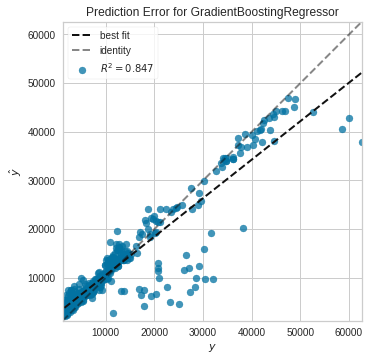

In [32]:
plot_model(tuned_gbr,plot='error')

texto

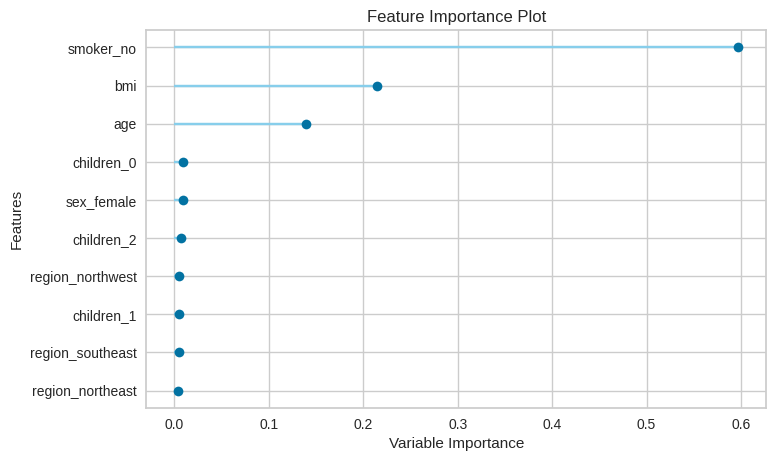

In [33]:
plot_model(tuned_gbr,plot='feature')

texto

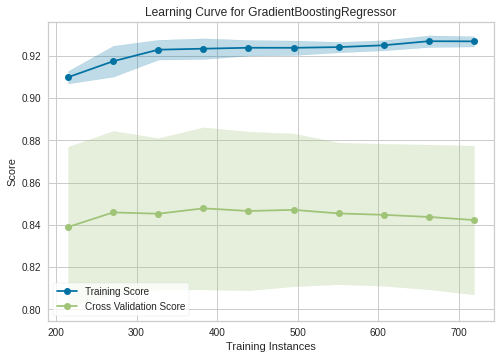

In [34]:
plot_model(tuned_gbr,plot='learning')

### Segundo Modelo -> LGBMRegressor

texto

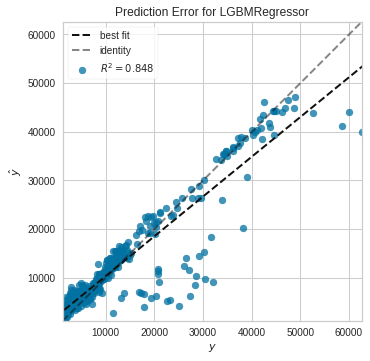

In [35]:
plot_model(tuned_lightgbm,plot='error')

texto

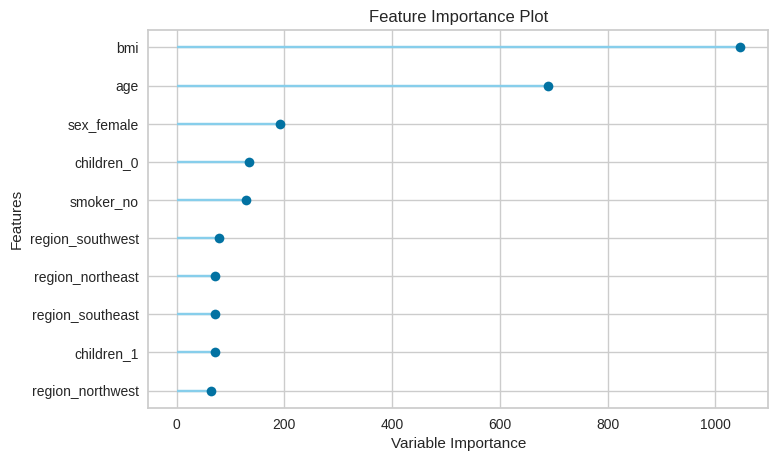

In [36]:
plot_model(tuned_lightgbm,plot='feature')

texto

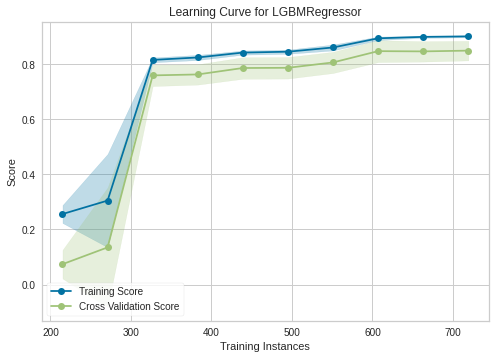

In [37]:
plot_model(tuned_lightgbm,plot='learning')

### Fazendo a checagem final dos modelos

In [40]:
#fazendo previsões para o primeiro modelo <-ler o que rafael escreveu
predict_model(tuned_gbr);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2735.9711,2.394507e+07,4893.3703,0.8472,0.4471,0.3468


In [41]:
#fazendo previsões para o segundo modelo <-ler o que rafael escreveu
predict_model(tuned_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,2670.4358,23751496.66,4873.5507,0.8484,0.4252,0.3042


#Previsão dos Custos de Seguro de Vida

#Conclusões

* isso
* aquilo
* etc